In [99]:
%load_ext autotime

from pycaret.regression import *
import pandas as pd
import numpy as np
from catboost import Pool, CatBoostRegressor
from xgboost import XGBRegressor
import seaborn as sns

data = pd.read_csv('ai-fall20/4. Feature Eng/08. Date Enc/3. Exercise/daily-temperatures.csv')





The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 10.3 ms


In [100]:
from datetime import *
from dateutil.parser import parse
data.Date = data.Date.apply(lambda x: pd.to_datetime(x,
    format='%Y-%m-%dT',
    errors='coerce'))

time: 450 ms


In [107]:
data.head()

,Temp,DateTemp,day,month,weekday,year
Date,,,,,,
1981-01-01,20.7,1981-01-01,1,1,3,1981
1981-01-02,17.9,1981-01-02,2,1,4,1981
1981-01-03,18.8,1981-01-03,3,1,5,1981
1981-01-04,14.6,1981-01-04,4,1,6,1981
1981-01-05,15.8,1981-01-05,5,1,0,1981


time: 9.39 ms


In [102]:
data['DateTemp'] = data.Date

time: 1.26 ms


In [106]:
data = data.set_index('Date')

time: 3.11 ms


In [104]:
df = data

df.DateTemp = df.DateTemp.astype('str')
df.DateTemp = df.DateTemp.apply(lambda x: parse(x))
df.DateTemp = df.DateTemp.apply(lambda x: pd.to_datetime(x,
    format='%Y-%m-%dT',
    errors='coerce'))
df['day'] = df.DateTemp.dt.day
df['month'] = df.DateTemp.dt.month
df['weekday'] = df.DateTemp.dt.weekday
df['year'] = df.DateTemp.dt.year


time: 248 ms


In [97]:
print(data)

            Temp   DateTemp
Date                       
1981-01-01  20.7 1981-01-01
1981-01-02  17.9 1981-01-02
1981-01-03  18.8 1981-01-03
1981-01-04  14.6 1981-01-04
1981-01-05  15.8 1981-01-05
...          ...        ...
1990-12-27  14.0 1990-12-27
1990-12-28  13.6 1990-12-28
1990-12-29  13.5 1990-12-29
1990-12-30  15.7 1990-12-30
1990-12-31  13.0 1990-12-31

[3650 rows x 2 columns]
time: 6.55 ms


In [110]:
grid = setup(data, 
             target='Temp', 
                fold_strategy='timeseries',
                fold=10,
                log_experiment=True,
                log_plots=True,
                experiment_name='Strive Assignment',
                data_split_shuffle=False,

         
             verbose=True,
             silent=False ,
             profile=True,
            

             n_jobs=1,
             session_id=17,
             preprocess=True
              )

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

time: 31.8 s


<AxesSubplot:>

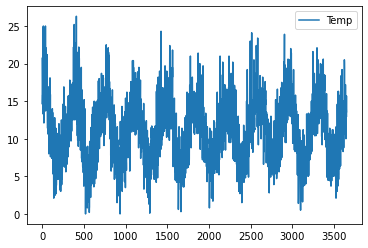

time: 224 ms


In [111]:
from matplotlib import pyplot
data = pd.read_csv('ai-fall20/4. Feature Eng/08. Date Enc/3. Exercise/daily-temperatures.csv')
data.plot()

In [59]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,2.3167,8.4463,2.8951,0.3601,0.2927,0.3517,0.5050
br,Bayesian Ridge,2.3316,8.4906,2.9032,0.3563,0.2932,0.3542,0.0360
ridge,Ridge Regression,2.3321,8.4913,2.9034,0.3562,0.2932,0.3538,0.0180
lar,Least Angle Regression,2.3439,8.5584,2.9145,0.3517,0.2937,0.3537,0.0270
gbr,Gradient Boosting Regressor,2.3450,8.7060,2.9373,0.3407,0.2959,0.3574,0.1380
catboost,CatBoost Regressor,2.3890,9.0512,2.9957,0.3127,0.2994,0.3599,7.4690
lightgbm,Light Gradient Boosting Machine,2.4267,9.3722,3.0308,0.2950,0.3051,0.3592,0.0570
rf,Random Forest Regressor,2.4744,9.7717,3.0895,0.2661,0.3099,0.3652,0.4360
xgboost,Extreme Gradient Boosting,2.4745,9.7415,3.0942,0.2653,0.3092,0.3666,0.7640
dt,Decision Tree Regressor,2.4928,9.9047,3.1127,0.2549,0.3122,0.3687,0.0170


time: 4min 22s


In [60]:
from sklearn.linear_model import HuberRegressor, LinearRegression

hr = tune_model(HuberRegressor(),n_iter=50,search_library='optuna', search_algorithm='tpe', early_stopping='asha',early_stopping_max_iters=15)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.4830,9.5006,3.0823,0.3697,0.2292,0.2149
1,2.7187,11.0569,3.3252,0.2025,0.4705,0.7458
2,2.4597,9.2194,3.0363,0.5101,0.2619,0.2567
3,2.3009,7.7756,2.7885,0.4543,0.2902,0.2590
4,2.1408,7.4402,2.7277,0.2577,0.3522,0.6472
5,2.3934,9.5888,3.0966,0.2843,0.2273,0.2012
6,1.9339,6.0784,2.4654,0.5834,0.3170,0.4677
7,2.0833,6.6877,2.5861,0.5307,0.2899,0.3005
8,2.3315,7.9377,2.8174,0.1022,0.2163,0.2083
9,2.1098,8.0079,2.8298,0.3858,0.2755,0.2583


time: 55.9 s


In [17]:
df = df.set_index('Date')

In [29]:
grid = setup(df, 
             target='Temp', 
                fold_strategy='timeseries',
                fold=10,
            data_split_shuffle=False,
         
             verbose=False,
             silent=False,
            
             n_jobs=1,
             session_id=17,
             preprocess=True
              )

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
day,Numeric
month,Categorical
weekday,Categorical
year,Categorical
Temp,Label


In [112]:
get_config('X_test')

,day,month_10,month_11,month_4,month_5,month_7,month_8,weekday_0,weekday_2,weekday_3,...,DateTemp_month_12,DateTemp_month_2,DateTemp_month_3,DateTemp_month_6,DateTemp_month_9,DateTemp_weekday_1,DateTemp_weekday_5,DateTemp_weekday_6,DateTemp_is_month_end_1,DateTemp_is_month_start_0
Date,,,,,,,,,,,,,,,,,,,,,
1987-12-31,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1988-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988-01-02,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1988-01-03,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1988-01-04,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1990-12-28,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1990-12-29,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


time: 39.1 ms


In [113]:
experiment = compare_models()

IntProgress(value=0, description='Processing: ', max=99)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:29:27
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2.4065,9.0250,2.9963,0.3147,0.2988,0.3389,0.1120
ridge,Ridge Regression,2.4113,9.0537,3.0012,0.3122,0.2991,0.3381,0.0260
huber,Huber Regressor,2.5785,11.2762,3.2837,0.1747,0.3265,0.3382,0.8790
omp,Orthogonal Matching Pursuit,2.9483,13.8955,3.7022,-0.0277,0.3690,0.4927,0.0140
llar,Lasso Least Angle Regression,3.2669,16.7738,4.0582,-0.2475,0.4026,0.5724,0.6020
lasso,Lasso Regression,3.2699,16.7979,4.0609,-0.2492,0.4027,0.5724,0.0400
en,Elastic Net,3.2783,16.9182,4.0692,-0.2582,0.4032,0.5753,0.0170
par,Passive Aggressive Regressor,5.7355,72.5242,6.7800,-3.4635,0.6180,0.6144,0.0130
lr,Linear Regression,148.6707,326924.1168,257.9897,-30253.2035,0.8200,11.9565,0.0160
lar,Least Angle Regression,160.6641,481223.2074,222.1520,-34708.4819,0.7498,24.6409,0.0280


In [8]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train_df, title='Tempurature Report', explorative = True)
profile

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Manual editing 


In [79]:
data.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [61]:
data = data.set_index('Date', inplace=True)

time: 2.02 ms


In [62]:
from datetime import *
from dateutil.parser import parse


time: 262 µs


In [63]:
from fbprophet import Prophet
from hcrystalball.wrappers import ProphetWrapper
fbp = ProphetWrapper(df)

time: 342 µs


In [64]:
fbp.fit(get_config('X_train'),get_config('y_train'))

ValueError: `X` must contain index of type datetime. Your index is Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553],
           dtype='int64', length=2554)

In [ ]:
get_config()

In [32]:

proph = create_model(fbp)

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:29:27
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


ValueError: `X` must contain index of type datetime. Your index is RangeIndex(start=0, stop=2554, step=1)